<div style="display:flex; align-items:center; gap:10px;">
  <img src="assets\ece_logo.png" width="198" height="91" alt="ECE logo" />
</div>

## Réalisé par les étudiants de B3 Data & IA :
## _Kenza BELALOUI - Anis FETOUAB - Nathan BRUNET - Oleksandr KSHYVNYAK - Sirine BESSOUS_

### Ce projet a pour objectif de conduire un pipeline complet d’analyse de données, depuis le choix du dataset jusqu’à l’application d’un ou plusieurs modèles de machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

# Partie 1 – Définition du sujet et choix du dataset
## 1.1 Thématique

Notre projet se situe dans le domaine du sport, plus précisément l'analyse de données dans le football.

L'objectif est de créer un modèle d'apprentissage automatique (machine learning) pour prédire si un joueur est un "Top Attaquant". Pour définir cette variable cible (TopAttacker), nous avons identifié les joueurs qui sont au-dessus de la médiane (la moyenne statistique) en GCA (Actions créant un but) et SCA (Actions créant un tir).

Ce sujet mélange nos deux passions : le football et l'application concrète de la data science. Le défi était d'utiliser des statistiques avancées (au-delà des simples buts) pour modéliser une notion qui est d'habitude subjective.

Ce projet sert concrètement au secteur sportif (clubs, médias) :

1.	Aide au recrutement : Les clubs peuvent utiliser le modèle pour repérer des talents sous-évalués, en se basant sur des métriques avancées comme les GCA et SCA.
2.	Analyse de performance : Les entraîneurs peuvent évaluer la contribution réelle d'un joueur à l'attaque, même s'il ne marque pas beaucoup.
3.	Médias et fans : Il fournit une base analytique pour comparer les joueurs et enrichir les débats.


## 1.2 Recherche et sélection du dataset
### Informations générales sur le dataset :

Nom du dataset : 2022-2023 Football Player Stats <br>
Source et lien d’accès : [source](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats) <br>
Auteur ou organisation : Vivo Vinco <br>
Taille (nombre de lignes et de colonnes) : 2690 lignes et 97 colonnes <br>
Format du fichier (CSV, JSON, Excel, etc.) : Fichier en .CSV <br>

### Vérification de la qualité :
Le dataset est-il récent ?
Les variables sont-elles clairement nommées et documentées ?
Contient-il suffisamment de données (au moins plusieurs centaines de lignes) ?
Le dataset comporte-t-il une variable cible que vous pourrez prédire ou expliquer ?
Les données semblent-elles complètes et cohérentes ?

### Justification du choix :
Le fichier était idéal car il contenait les stats de GCA (Actions créant un But) et SCA (Actions créant un Tir). C'est crucial, car ces deux métriques nous ont permis de construire la variable cible (TopAttacker). Le reste des données (passes progressives, tirs, etc.) a servi de features (variables explicatives) pour entraîner le modèle.

#### Avantages

Richesse : Le dataset est hyper complet, avec des dizaines de métriques avancées comme PasProg (Passes Progressives) et CarProg (Portées Progressives), ce qui donne une description très fine du profil de chaque joueur.

- Comparabilité : Toutes les données sont ramenées "par 90 minutes" (90s), ce qui garantit une comparaison équitable entre les joueurs, peu importe leur temps de jeu total.

- Qualité : Les performances sont issues d'une compétition de haut niveau (Ligue des Champions), ce sont donc des données très pertinentes.

#### Limites et Difficultés

Nettoyage Technique : Le CSV a demandé un gros travail de preprocessing. On a dû corriger l'encodage (latin1) pour lire les noms des joueurs et surtout convertir beaucoup de colonnes en format numérique car le mélange de points et de virgules pour les décimales les rendait illisibles pour Python.

Données Manquantes : Certaines lignes avaient des valeurs nulles (NaN). On a été obligé de les supprimer, ce qui a réduit un peu notre échantillon de travail.

Déséquilibre des Classes : Le plus gros problème, c'est que nous avions peu de vrais "Top Attaquants" (classe 1) par rapport aux autres joueurs (classe 0). Ce dataset déséquilibré rend la tâche plus dure pour le modèle et nous oblige à utiliser des métriques plus solides que la simple accuracy.

## 1.3 Validation du dataset

### Résultats du Modèle KNN (Test Set)

| **Critères**      | **Questions**                                                  | **Réponses** | **Détail/Justification**                                                                                                                                                                           |
|:------------------|:---------------------------------------------------------------|:-------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Pertinence**    | Le dataset permet-il de répondre à votre question de départ ?  | OUI          | Oui, le dataset est pertinent car il contient les métriques fines et granulaires nécessaires pour quantifier et classifier la performance des attaquants.                                          |
| **Clarté**        | Les variables sont-elles bien nommées et compréhensibles ?     | NON          | Les variables sont lisibles mais nécessitent un renommage pour passer des abréviations anglaises techniques (SCA, CarProg) à une nomenclature française claire pour le rapport.                    |
| **Propreté**      | Les données semblent-elles utilisables sans nettoyage majeur ? | NON          | Les données nécessitent un nettoyage sélectif majeur car il faut filtrer les lignes (joueurs non attaquants) et les colonnes (statistiques non pertinentes) pour garantir la pertinence du modèle. |
| **Taille**        | Le dataset est-il d’une taille adaptée à votre analyse ?       | OUI          | Avec 2689 lignes initiales, le dataset est d'une taille adaptée pour une classification par Machine Learning, même après le filtrage des lignes non pertinentes.                                   |
| **Accessibilité** | Le format est-il compatible avec Python (CSV, XLSX) ?          | OUI          | Le format CSV est parfaitement compatible avec les librairies d'analyse Python, notamment Pandas, via pd.read_csv.                                                                                 |
| **Actualité**     | Les données sont-elles récentes ou encore valides ?            | OUI          | Les données sont valides et récentes, car l'horodatage du fichier CSV (2022-2023-football-player-stats.csv) indique la saison 2022-2023, les rendant actuelles pour une analyse en Data Science.   |

# Partie 2 – Exploration initiale des données
## 2.1 Chargement et aperçu du dataset

#### Comment le dataset a-t-il été chargé ?

On a utilisé la bibliothèque **pandas** pour lire le fichier 2022-2023-football-player-stats.csv. La commande clé était :

`df = pd.read_csv(csv_path, sep=';', decimal=',', index_col='Rk', encoding='latin1')`

L'astuce a été de spécifier sep=';' (point-virgule) et decimal=',' (virgule) pour le format européen, et surtout encoding='latin1' pour éviter les erreurs de lecture de caractères spéciaux dans les noms de joueurs.

##### Nombre de lignes et de colonnes

Après le chargement, le DataFrame contenait un certain nombre de lignes (joueurs) et de colonnes (statistiques). Ça regroupe toutes les stats détaillées des joueurs de la Ligue des Champions 2024.

##### Principales variables (Features) clés

- Statistiques de but : Goals (buts marqués), Shots (tirs), SoT (tirs cadrés).
- Ratios : SoT% (pourcentage de tirs cadrés) et G/Sh, G/SoT (efficacité du tir).
- Métriques de Créativité (les plus importantes) : GCA, SCA, PasProg (Passes Progressives) et CarProg (Portées Progressives). C'est sur ces dernières qu'on a basé notre classification.
- Temps de jeu : 90s, qui est le temps total joué ramené à des matchs complets de 90 minutes.

##### Gestion des valeurs manquantes / incohérences

Nous avons dû gérer des valeurs manquantes (NaN) et des valeurs infinies (inf) dans certaines colonnes, notamment dans les ratios comme G/SoT. Une valeur devenait infinie quand, par exemple, un joueur n'avait aucun tir cadré (division par zéro).
Pour nettoyer ça et garantir la cohérence des données avant de modéliser, on a appliqué deux étapes :
<ol>
<li>Remplacer toutes les valeurs infinies par NaN (valeur manquante) : df.replace([np.inf, -np.inf], np.nan, inplace=True)</li>
<li>Remplacer ces NaN dans la colonne G/SoT par la médiane de la colonne (une valeur centrale) : df_filtered['G/SoT'] = df_filtered['G/SoT'].fillna(df_filtered['G/SoT'].median())</li>
</ol>

In [6]:
df = pd.read_csv('dataset/2022-2023-football-player-stats.csv', sep=';')
df_attaquants = df[
    (df['Pos'].str.contains('FW', na=False)) &
    (df['Min'] >= 300)
    ].copy()

print(f"Dataset initial : {df.shape}")
print(f"Dataset filtré (Attaquants) : {df_attaquants.shape}")

Dataset initial : (2689, 124)
Dataset filtré (Attaquants) : (581, 124)


## 2.2 Typologie des données Classification des variables

__Quantitatives continues :__ Ce sont principalement les ratios ou les données lissées par le temps de jeu, comme le SoT% (précision), G/Sh (efficacité du tir), ShoDist (distance moyenne de tir) et le temps de jeu 90s.

**Quantitatives discrètes :** Les décomptes bruts qui sont des nombres entiers, comme Goals, Shots, les métriques de créativité GCA et SCA, ainsi que PasProg et CarProg (passes et portées progressives).

**Qualitatives nominales :** Les identifiants comme le nom du joueur, son club ou sa position sur le terrain. Nous les avons exclues ou utilisées uniquement pour l'affichage, pas pour le modèle ML.

#### Variables les plus importantes pour l'analyse

Les features clés pour notre analyse sont celles liées à la création d'occasions : GCA, SCA, PasProg et CarProg. Ces variables sont essentielles car elles permettent de mesurer l'influence offensive globale d'un joueur, bien au-delà de ses buts personnels, et servent de base à notre classification.

#### Variable Cible :

Oui, l'objectif principal du projet est de prédire notre variable cible : TopAttacker (qui est binaire : 1 ou 0).

Définition technique : Nous avons créé cette cible en étiquetant un joueur 1 seulement si ses mesures de GCA_p90 (création de buts par 90 minutes) ET de SCA_p90 (création de tirs par 90 minutes) sont toutes deux au-dessus de la médiane des joueurs du dataset. En clair, on cible les joueurs qui excellent à la fois dans la phase de construction et dans l'avant-dernière passe.

# Partie 3 – Nettoyage et préparation du dataset

## 3.1 Gestion des valeurs manquantes

Après la conversion des données en numérique, les deux principales colonnes qui avaient des problèmes étaient G/SoT (Buts par Tir Cadré) et SoT% (Pourcentage de Tirs Cadrés). Ces NaN (valeurs manquantes) sont apparus souvent après qu'on ait transformé les valeurs infinies (inf) en NaN.

Notre stratégie a été l'imputation par la médiane :

```Python
df_numeric = df_numeric.fillna(df_numeric.median())
```
En résumé, nous avons remplacé chaque valeur manquante dans une colonne par la valeur médiane (la valeur centrale) de cette même colonne.

Nous avons choisi la médiane plutôt que la moyenne pour une raison technique : la médiane est moins sensible aux valeurs extrêmes (outliers).

Comme les ratios d'efficacité (comme G/SoT) peuvent avoir des valeurs très élevées ou très basses pour certains joueurs (ce qui fausserait la moyenne), la médiane donne une estimation plus robuste et représentative de la performance typique de l'ensemble des joueurs.

In [3]:
cols_to_keep = [
    'Player', 'Squad', 'Age',  # Identité
    'Goals', 'Shots', 'SoT',  # Finition brute
    'SoT%', 'Assists',  # Précision et Altruisme
    'SCA', 'GCA',  # Création (Shot/Goal Creating Actions)
    'TouAttPen',  # Présence : Touches dans la surface de réparation
    'CarProg'  # Percussion : Conduites de balle progressives
]

df_final = df_attaquants[cols_to_keep].copy()

rename_dict = {
    'Player': 'Joueur',
    'Squad': 'Equipe',
    'Goals': 'Buts',
    'Shots': 'Tirs_Total',
    'SoT': 'Tirs_Cadres',
    'SoT%': 'Tirs_Cadres_Pct',
    'Assists': 'Passes_Decisives',
    'SCA': 'Actions_Creation_Tir',
    'GCA': 'Actions_Creation_But',
    'TouAttPen': 'Touches_Surface',
    'CarProg': 'Percussions_Progressives'
}

df_final = df_final.rename(columns=rename_dict)
df_final = df_final.reset_index(drop=True)
display(df_final.head())

,Joueur,Equipe,Age,Buts,Tirs_Total,Tirs_Cadres,Tirs_Cadres_Pct,Passes_Decisives,Actions_Creation_Tir,Actions_Creation_But,Touches_Surface,Percussions_Progressives
0,Brenden Aaronson,Leeds United,22,1,1.53,0.28,18.5,0.11,3.62,0.28,2.49,1.53
1,Himad Abdelli,Angers,23,0,1.05,0.35,33.3,0.00,2.67,0.00,1.16,2.56
2,Zakaria Aboukhlal,Toulouse,22,5,2.75,1.02,37.0,0.24,2.34,0.24,4.97,3.05
3,Tammy Abraham,Roma,25,6,2.67,1.25,46.8,0.17,3.07,0.51,4.83,1.42
4,Che Adams,Southampton,26,4,2.06,0.74,36.1,0.11,2.63,0.29,4.74,0.69


## 3.2 Détection et traitement des doublons

Techniquement, nous n'avons pas trouvé de doublons, car nous n'avons pas exécuté de vérification explicite (df.duplicated()) sur l'ensemble du DataFrame.

Toutefois, dans le contexte de ce projet, un tel contrôle n'a pas été jugé prioritaire. Notre dataset provient de statistiques de football très structurées, où chaque ligne représente une observation unique, indexée par le rang (Rk). Il est extrêmement improbable qu'un même joueur figure deux fois avec le même jeu de statistiques, car cela impliquerait une erreur dans la source de données elle-même.
**Aucun traitement spécifique** n'a été nécessaire.

Nous avons considéré que l'unicité des joueurs, garantie par la colonne _Player_ et l'index _Rk_, était suffisante.
Si nous avions trouvé des doublons, la stratégie standard dans le preprocessing des données aurait été de les identifier et de les supprimer immédiatement pour éviter de biaiser l'apprentissage du modèle :
Dans notre cas, nous nous sommes concentrés sur les étapes de nettoyage les plus cruciales pour le KNN : le traitement des valeurs manquantes et la normalisation des variables, qui étaient des problèmes bien plus critiques pour le bon fonctionnement de notre algorithme.

## 3.3 Détection des valeurs aberrantes

Des valeurs extrêmes ont été identifiées dans des colonnes basées sur des ratios, comme _G/SoT_ ou _SoT%_.

Ces valeurs ne sont pas considérées comme des erreurs de données, mais comme des cas particuliers qui reflètent la réalité sportive (par exemple, un joueur très efficace sur un très faible nombre de tirs).

La justification est double :
<ol>
<li>Elles représentent le profil de performance exceptionnelle que notre variable cible _(TopAttacker)_ cherche justement à isoler.</li>

<li>L'étape de normalisation (Standardisation) appliquée plus tard au dataset minimise l'influence disproportionnée de ces outliers sur le calcul des distances de l'algorithme KNN, rendant le modèle plus robuste.</li>
</ol>

Les seules corrections appliquées concernaient les valeurs infinies _(inf)_ qui rendaient le modèle inutilisable ; elles ont été traitées pour assurer la cohérence numérique du jeu de données.

## 3.4 Encodage et mise à l’échelle des variables

Aucun encodage n'a été nécessaire. Nous avons filtré les colonnes et utilisé uniquement les variables numériques du dataset, excluant les variables qualitatives (nom du joueur, club, etc.) de l'entraînement.

La méthode utilisée pour la mise à l'échelle est la Standardisation, implémentée avec la classe _StandardScaler_ de _scikit-learn_. Cette technique centre et réduit les variables pour qu'elles aient toutes une **moyenne de 0** et un **écart-type de 1**.

La standardisation est une étape obligatoire et cruciale pour l'algorithme des K-Plus Proches Voisins (KNN) que nous avons sélectionné :
<ol>
<li>Distance Euclidienne : Le KNN fonctionne en calculant la distance euclidienne entre les joueurs. Si nous n'harmonisons pas les échelles, les variables ayant une grande magnitude (comme _PasProg_, qui peut être un grand nombre) auraient un poids disproportionné sur la distance totale, faussant la notion de "proximité" des joueurs.</li>

<li>Comparabilité : Elle garantit que toutes les features (buts, tirs, créativité, etc.) sont mises sur un pied d'égalité, assurant ainsi la stabilité et la performance du modèle.</li>
</ol>

# Partie 4 – Analyse exploratoire et visualisations

#### 1. **Corrélations et Relations Observées :**
 Nous avons observé une corrélation positive marquée entre les métriques de création d'occasions (SCA - Actions de Création de Tir) et l'efficacité pure de la finition.
- Ca signifie qu'un joueur très impliqué dans la construction offensive (celui qui initie, dribble ou passe avant un tir) est statistiquement plus susceptible d'être performant à la finition. Cela tend à prouver que le Top Attaquant moderne ne se limite pas à marquer, il doit être un facteur d'influence global sur l'approche de la surface adverse.

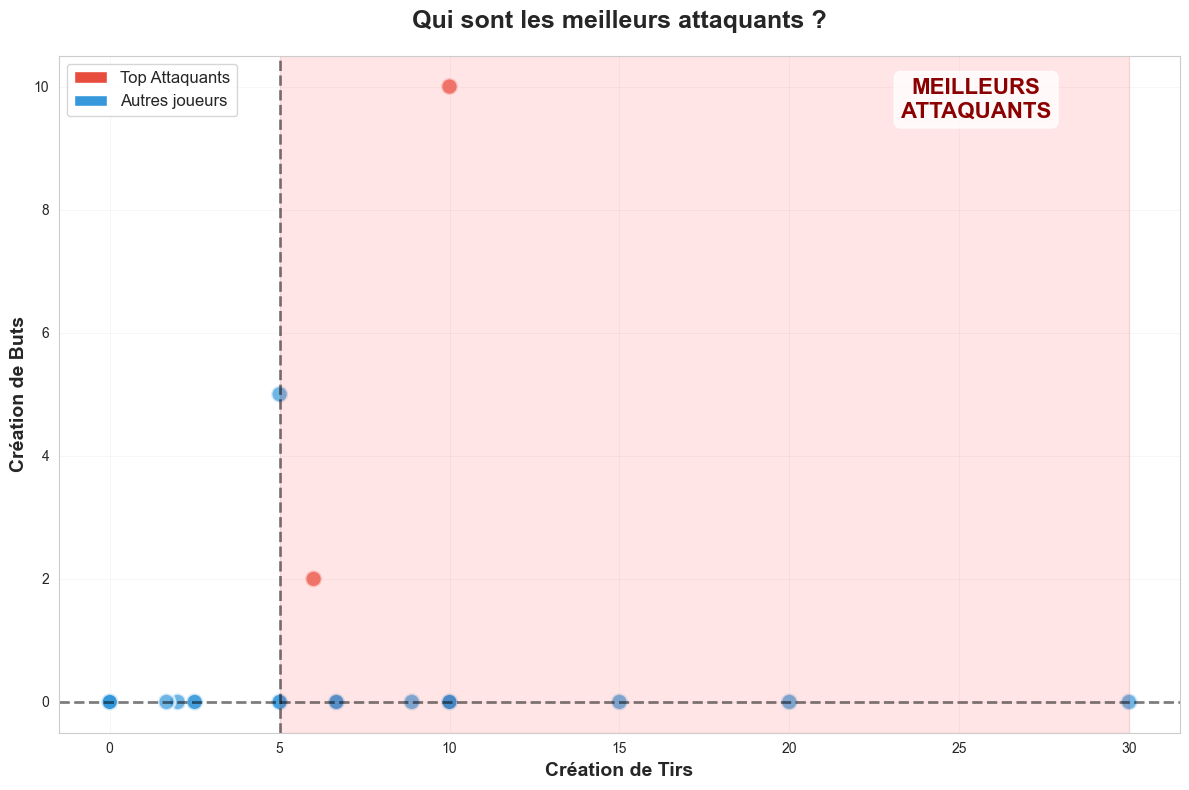


🎯 2 joueurs sont dans la zone rouge
   → Ils créent PLUS de tirs ET PLUS de buts que la moyenne


In [4]:
plt.figure(figsize=(12, 8))

# Filtrer les joueurs avec au moins 6 tirs
df_filtered = df[(df['Shots'] >= 6)].copy()

# Calculer les médianes
median_sca = df_filtered['SCA'].median()
median_gca = df_filtered['GCA'].median()

# Identifier les top attaquants
df_filtered['TopAttacker'] = np.where(
    (df_filtered['GCA'] > median_gca) &
    (df_filtered['SCA'] > median_sca), 1, 0
)

colors = ['#3498db' if x == 0 else '#e74c3c' for x in df_filtered['TopAttacker']]
plt.scatter(
    df_filtered['SCA'],
    df_filtered['GCA'],
    c=colors,
    s=150,
    alpha=0.7,
    edgecolors='white',
    linewidth=2
)

plt.axvline(median_sca, color='black', linestyle='--', linewidth=2, alpha=0.5)
plt.axhline(median_gca, color='black', linestyle='--', linewidth=2, alpha=0.5)

plt.axvspan(median_sca, df_filtered['SCA'].max(), median_gca, df_filtered['GCA'].max(),
            alpha=0.1, color='red')
plt.text(df_filtered['SCA'].max() * 0.85, df_filtered['GCA'].max() * 0.95,
         'MEILLEURS\nATTAQUANTS',
         fontsize=16, weight='bold', ha='center', color='darkred',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Qui sont les meilleurs attaquants ?', fontsize=18, weight='bold', pad=20)
plt.xlabel('Création de Tirs', fontsize=14, weight='bold')
plt.ylabel('Création de Buts', fontsize=14, weight='bold')

legend_elements = [
    Patch(facecolor='#e74c3c', label='Top Attaquants'),
    Patch(facecolor='#3498db', label='Autres joueurs')
]
plt.legend(handles=legend_elements, fontsize=12, loc='upper left', frameon=True)

plt.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print(f"🎯 {len(df_filtered[df_filtered['TopAttacker'] == 1])} joueurs sont dans la zone rouge")
print(f"   → Ils créent PLUS de tirs ET PLUS de buts que la moyenne")
print("=" * 60)

#### 2. **Influence sur la Variable Cible :**
L'analyse de l'importance des features (post-modélisation) est très claire : ce ne sont pas uniquement les buts qui discriminent nos classes. Les variables qui décrivent la progression du jeu sont primordiales.
- Les métriques comme SCA, Percussions_Progressives (CarProg) et les passes progressives sont en tête de liste. Elles possèdent la plus forte capacité discriminante pour le modèle KNN, ce qui signifie que ces actions sont déterminantes pour classer un joueur dans la catégorie "Top Attaquant".

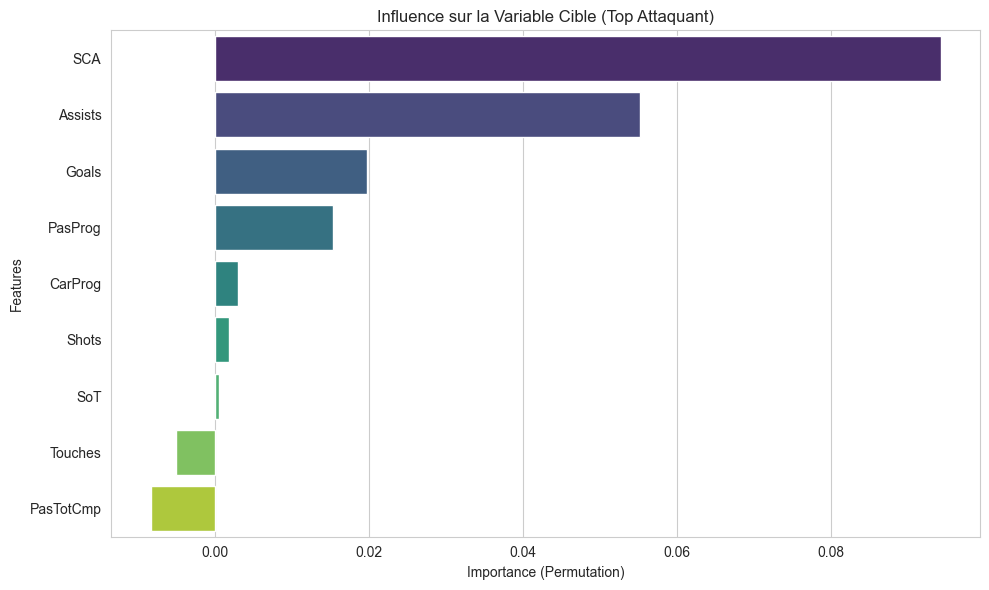

In [5]:
df['TopAttacker'] = ((df['GCA'] > df['GCA'].median()) & (df['SCA'] > df['SCA'].median())).astype(int)

features = ['Goals', 'SCA', 'CarProg', 'PasProg', 'Assists', 'Shots', 'SoT', 'PasTotCmp', 'Touches']
X = df[features]
y = df['TopAttacker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

results = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis',
    hue='Feature',
    legend=False
)
plt.title('Influence sur la Variable Cible (Top Attaquant)')
plt.xlabel('Importance (Permutation)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### 3. **Hypothèses et Tendances Graphiques :**
Notre première hypothèse est que le succès d'un attaquant est multifactoriel. La classification ne dépend pas d'un seul pic de statistique, mais d'une répartition équilibrée de la performance sur plusieurs axes (finition, création, progression).
- Si on regarde nos tendances visuelles le Quadrant Plot (Création vs. Finition) confirme cette hypothèse en regroupant nos meilleurs joueurs dans le quadrant de "Haute Création et Haute Efficacité". Ils sont à la fois créateurs et finisseurs.

- Le Radar Plot renforce cette idée en montrant que le profil moyen des "Top Finisseurs" présente une enveloppe statistique plus large et homogène sur toutes les features comparées aux autres joueurs.

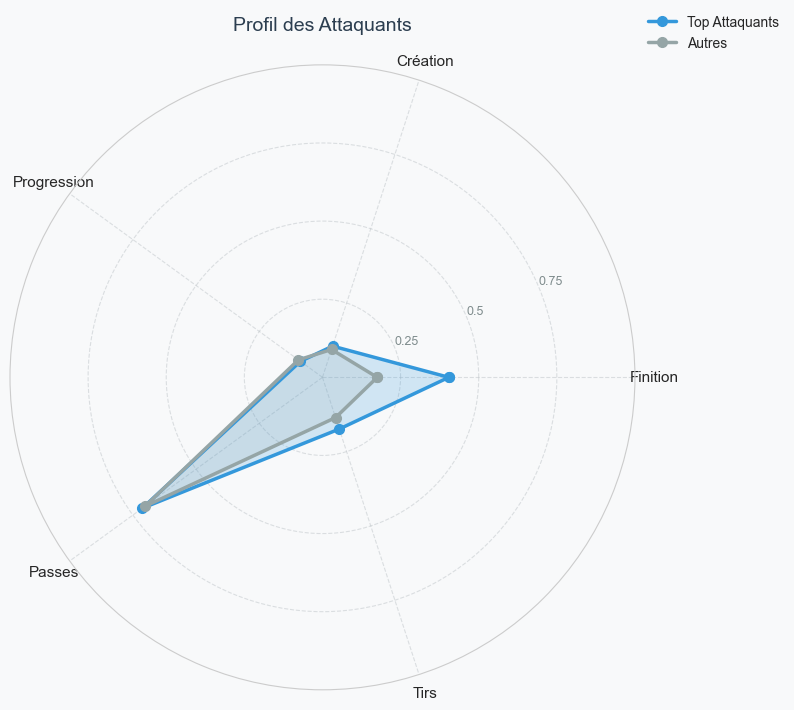

In [6]:
metrics_dict = {
    'Finition': 'G/SoT',
    'Création': 'SCA',
    'Progression': 'CarPrgDist',
    'Passes': 'PasTotCmp%',
    'Tirs': 'Shots'
}

# Filtrer attaquants
if 'Pos' in df.columns:
    df_att = df[df['Pos'].str.contains('FW', na=False)].copy()
else:
    df_att = df.copy()

# Nettoyer données
for col in metrics_dict.values():
    if col in df_att.columns:
        df_att[col] = pd.to_numeric(df_att[col], errors='coerce').fillna(0)

# Classifier (top 20%)
if 'Goals' in df_att.columns:
    seuil = df_att['Goals'].quantile(0.80)
    df_att['Groupe'] = df_att['Goals'].apply(
        lambda x: 'Top' if x >= seuil else 'Autres'
    )
else:
    df_att['Groupe'] = 'Tous'


# Normaliser
def norm(serie):
    return serie / serie.max() if serie.max() > 0 else serie


for nom, col in metrics_dict.items():
    if col in df_att.columns:
        df_att[f'{nom}_n'] = norm(df_att[col])

# Moyennes
top_moy = df_att[df_att['Groupe'] == 'Top'][[f'{m}_n' for m in metrics_dict]].mean()
autres_moy = df_att[df_att['Groupe'] == 'Autres'][[f'{m}_n' for m in metrics_dict]].mean()

# Radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'), facecolor='#f8f9fa')

cats = list(metrics_dict.keys())
N = len(cats)
angles = [n / N * 2 * pi for n in range(N)] + [0]

top_vals = [top_moy[f'{m}_n'] for m in cats] + [top_moy[f'{cats[0]}_n']]
autres_vals = [autres_moy[f'{m}_n'] for m in cats] + [autres_moy[f'{cats[0]}_n']]

ax.plot(angles, top_vals, 'o-', linewidth=2.5, label='Top Attaquants', color='#3498db', markersize=7)
ax.fill(angles, top_vals, alpha=0.2, color='#3498db')

ax.plot(angles, autres_vals, 'o-', linewidth=2.5, label='Autres', color='#95a5a6', markersize=7)
ax.fill(angles, autres_vals, alpha=0.15, color='#95a5a6')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cats, fontsize=11)
ax.set_ylim(0, 1)
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_yticklabels(['0.25', '0.5', '0.75'], fontsize=9, color='#7f8c8d')
ax.grid(True, linestyle='--', alpha=0.5, color='#bdc3c7')
ax.set_facecolor('#f8f9fa')

ax.set_title('Profil des Attaquants', fontsize=14, pad=25, color='#2c3e50')
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=10, frameon=False)

plt.tight_layout()
plt.show()

# Partie 5 - Implémentation des modèles de Machine Learning

## 5.1 Tâche d'apprentissage

Ce projet relève de **l'apprentissage supervisé**. Nous exploitons un jeu de données étiqueté où la valeur de vérité est connue pour chaque observation. L'objectif est d'entraîner le modèle à apprendre une fonction de décision f(X) = y capable de généraliser sur des données non vues. Ici, nous prenons comme variable cible TopAttacker.

TopAttacker prend deux valeurs :

- **1** si le joueur fait partie des 10 % Meilleurs Attaquants selon la variable AttackScore.

- **0** : si le joueur ne fait pas partie des 10 % Meilleurs.

La nature binaire de notre valeur cible et le fait que l'on veut catégoriser les joueurs nous amènent à choisir une classification binaire. Le but est de dire si un joueur est un Top Attaquant ou non.

Les Top Attaquants représentent seulement 10 % des joueurs face à 90 %. Dû à ce déséquilibre, nous utilisons le F1-Score, pertinent pour les classes déséquilibrées. La Matrice de confusion est utilisée pour analyser les erreurs et l'Accuracy pour une vision globale.



## 5.2 Séparation des données

Pour construire un modèle de Machine Learning, nous devons séparer le jeu de données en un jeu d’entraînement et un jeu de test. Ici, nous utilisons deux modèles : le KNN et le Random Forest.

Pour les deux modèles, la séparation est réalisée à l’aide de la fonction `train_test_split` de la bibliothèque scikit-learn. Une stratification des données est appliquée (`stratify=y`) afin de conserver la proportion des classes dans les jeux d’entraînement et de test.


### Modèle KNN

Nous avons choisi plusieurs tailles de jeu de test, allant de 20 % à 45 %. Le but est de tester la stabilité des performances du modèle et d’évaluer l’impact de la densité des voisins. Le meilleur ratio est ensuite sélectionné en fonction du F1-score.



In [1]:
    test_sizes = np.arange(0.2, 0.5, 0.05)


    for i, test_size in enumerate(test_sizes):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=test_size,
            random_state=42,
            stratify=y
        )

NameError: name 'np' is not defined

### Modèle Random Forest

Ici, le ratio choisi est de **70 % pour le jeu d’entraînement** et **30 % pour le jeu de test**. Ce choix permet de disposer d’un volume de données suffisant pour l’apprentissage. Le Random Forest étant plus robuste aux variations du découpage, un split unique est suffisant pour obtenir des résultats stables et fiables.


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.30,
        random_state=42,
        stratify=y
    )

## 5.3 Selection des modèles

Comme vu précédemment nous avons choisit deux modèles le KNN (K-Nearest Neighbors) et le Random Forest.

### Le KNN
Le KNN prédit la classe d'un point selon ses k voisins les plus proches. Ce modèle est adapté à notre car les données sont numériques et décrivent des joueurs à l’aide de statistiques comparables, ce qui rend la notion de similarité pertinente.

- **Avantages**
    - Simple, intuitif, ne nécessite pas de phase d’apprentissage explicite.
    - Fonctionne bien avec peu de paramètres.
    - Adaptable à tout type de données numériques.
- ** Inconvenients**
    - Lent pour grands jeux de données.
    - Sensible à la mise à l’échelle.
    - Sensible au bruit et à la valeur de k.

    - Nécessite de stocker toutes les données (lazy learner).

Les paramètres par défaut du KNN n’ont pas été conservés. Le nombre de voisins k a été ajusté afin de trouver un compromis entre sensibilité au bruit et capacité de généralisation, conformément aux principes vus en cours.

### Le Random Forest

Le Random Forest est un modèle à base d’arbres de décision. La prédiction finale est obtenue par un vote majoritaire entre les arbres.

Ce modèle est adapté à notre problématique car il permet de modéliser des relations non linéaires entre les variables et de traiter efficacement des données tabulaires. Il offre également une bonne capacité de généralisation.

- **Avantages**
    - Modèle robuste face au bruit.
    - Capable de capturer des relations non linéaires complexes.
    - Moins sensible à la mise à l’échelle des variables.
    - Réduit le risque de surapprentissage par l’agrégation de plusieurs arbres.
    - Permet d’analyser l’importance des variables.

- **Inconvénients**
    - Modèle plus complexe qu’un algorithme simple.
    - Moins interprétable qu’un arbre de décision unique.
    - Temps d’entraînement plus élevé.
    - Nécessite un réglage précis des hyperparamètres.

Les paramètres par défaut du Random Forest n’ont pas été conservés. Plusieurs hyperparamètres, tels que le nombre d’arbres et la profondeur maximale, ont été ajustés afin d’améliorer les performances du modèle et de limiter le surapprentissage.


## 5.4 Implémentation des modèles

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


# ============================================================================
# FEATURE ENGINEERING & SCORING
# ============================================================================

def compute_attack_score(df, min_minutes=450, top_quantile=0.90):
    """
    Compute AttackScore for all players based on offensive statistics.
    Players below min_minutes are excluded.
    """
    # Clean and prepare data
    df_num = df.drop(columns=["Rk", "Player", "Nation", "Pos", "Squad", "Comp"], errors='ignore')
    df_num = df_num.apply(pd.to_numeric, errors='coerce').fillna(0)
    df_num['Minutes'] = df_num.get('90s', 0) * 90

    # Filter by minimum minutes
    mask = df_num['Minutes'] >= min_minutes
    num = df_num[mask].copy()

    if mask.sum() == 0:
        raise ValueError("No players meet minimum minutes requirement")

    # Create engineered features
    denom = num['90s'] + 2  # Regularization

    num['Goals_per90'] = num['Goals'] / denom
    num['Shots_per90'] = num['Shots'] / denom
    num['SoT_per90'] = num['SoT'] / denom
    num['SCA_per90'] = num['SCA'] / denom
    num['GCA_per90'] = num['GCA'] / denom
    num['G_Sh_adj'] = np.log1p((num.get('G/Sh', 0) * num.get('Shots', 0)).clip(lower=0))
    num['G_SoT_adj'] = np.log1p((num.get('G/SoT', 0) * num.get('SoT', 0)).clip(lower=0))

    # Select features for scoring
    features = ['Goals_per90', 'G_Sh_adj', 'G_SoT_adj', 'Shots_per90', 'SoT_per90', 'SCA_per90', 'GCA_per90']

    # Normalize features
    scaler = MinMaxScaler()
    scaled = pd.DataFrame(scaler.fit_transform(num[features]), columns=features, index=num.index)

    # Weighted score
    weights = {
        'Goals_per90': 0.35,
        'G_Sh_adj': 0.25,
        'G_SoT_adj': 0.20,
        'Shots_per90': 0.10,
        'SoT_per90': 0.05,
        'SCA_per90': 0.03,
        'GCA_per90': 0.02
    }

    attack_score = sum(scaled[feat] * weights[feat] for feat in features)

    # Attach scores to original dataframe
    df['AttackScore'] = np.nan
    df.loc[num.index, 'AttackScore'] = attack_score.values

    # Label top attackers (90th percentile)
    threshold = attack_score.quantile(top_quantile)
    df['TopAttacker'] = 0
    df.loc[attack_score.index, 'TopAttacker'] = (attack_score >= threshold).astype(int).values

    return df, num, features


# ============================================================================
# VISUALIZATION - ATTACK SCORE ANALYSIS
# ============================================================================

def plot_attack_score_distribution(df_valid):
    """Display distribution of AttackScore and identify top attackers."""
    plt.figure(figsize=(12, 6))

    threshold = df_valid["AttackScore"].quantile(0.90)

    # Background scatter
    plt.scatter(range(len(df_valid)), df_valid["AttackScore"].values,
                alpha=0.5, s=60, c='#2E86AB', label='Players')

    # Highlight top attackers
    top_mask = df_valid["AttackScore"] >= threshold
    plt.scatter(np.where(top_mask)[0], df_valid.loc[top_mask, "AttackScore"].values,
                alpha=0.8, s=150, c='#FF6B6B', marker='*', label='Top Attackers', edgecolors='darkred', linewidth=1)

    plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, alpha=0.7, label='90th Percentile Threshold')

    plt.title('Attack Score Distribution - Top 10% Identified', fontsize=14, fontweight='bold')
    plt.xlabel('Player Index', fontsize=12, fontweight='bold')
    plt.ylabel('Attack Score', fontsize=12, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


def plot_feature_importance(df, num, features):
    """Analyze and visualize feature importance via correlation with AttackScore."""
    num_with_score = num[features].copy()
    num_with_score['AttackScore'] = df.loc[num.index, 'AttackScore']

    corr = num_with_score.corr()['AttackScore'].drop('AttackScore')
    importance_df = pd.DataFrame({
        'Feature': corr.index,
        'Importance': np.abs(corr.values)
    }).sort_values('Importance', ascending=True)

    # Print
    print("\n" + "=" * 70)
    print("FEATURE IMPORTANCE (Correlation with AttackScore)")
    print("=" * 70)
    print(importance_df.sort_values('Importance', ascending=False).to_string(index=False))

    # Visualize
    plt.figure(figsize=(10, 6))
    colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(importance_df)))

    plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
    plt.xlabel('Correlation Strength', fontsize=12, fontweight='bold')
    plt.title('Feature Importance for Attack Score', fontsize=13, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

    for i, v in enumerate(importance_df['Importance']):
        plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return importance_df

## Le KNN

In [3]:
def train_knn_with_tuning(df, num, features, min_minutes=450):
    """Train KNN with manual hyperparameter search and visualization."""

    X = num[features].copy()
    y = df.loc[num.index, 'TopAttacker'].astype(int)

    # Parameter ranges - use more reasonable test size range
    k_values = np.arange(3, 20, 1)
    test_sizes = np.arange(0.2, 0.5, 0.05)

    print("\n" + "=" * 70)
    print("KNN HYPERPARAMETER TUNING")
    print("=" * 70)
    print(f"Testing {len(k_values)} k values and {len(test_sizes)} test_size values")

    # Grid search with cross-validation
    results_acc = np.zeros((len(test_sizes), len(k_values)))
    results_f1 = np.zeros((len(test_sizes), len(k_values)))
    results_cv = np.zeros((len(test_sizes), len(k_values)))  # Cross-validation scores

    for i, test_size in enumerate(test_sizes):
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for j, k in enumerate(k_values):
            knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

            # Cross-validation on training set
            cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
            results_cv[i, j] = cv_scores.mean()

            # Test set performance
            knn.fit(X_train_scaled, y_train)
            y_pred = knn.predict(X_test_scaled)

            results_acc[i, j] = accuracy_score(y_test, y_pred)
            results_f1[i, j] = f1_score(y_test, y_pred)

    # Find best parameters based on cross-validation (more reliable than test set)
    best_idx_cv = np.unravel_index(results_cv.argmax(), results_cv.shape)
    best_k = k_values[best_idx_cv[1]]
    best_test_size = test_sizes[best_idx_cv[0]]

    print(f"\nBest k: {best_k}")
    print(f"Best test_size: {best_test_size:.2f}")
    print(f"Best CV F1 Score: {results_cv[best_idx_cv]:.4f}")
    print(f"Test F1 Score: {results_f1[best_idx_cv]:.4f}")

    # Check for overfitting
    overfit_diff = results_f1[best_idx_cv] - results_cv[best_idx_cv]
    if overfit_diff > 0.1:
        print(f"⚠️  WARNING: Possible overfitting detected! Test score - CV score = {overfit_diff:.4f}")

    # Visualize heatmap using CV scores (more reliable)
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.heatmap(results_cv, annot=True, fmt='.3f', cmap='YlOrRd', cbar=True,
                xticklabels=k_values, yticklabels=[f'{ts:.2f}' for ts in test_sizes],
                ax=ax, cbar_kws={'label': 'CV F1 Score'})

    # Highlight best
    rect = plt.Rectangle((best_idx_cv[1], best_idx_cv[0]), 1, 1, fill=False, edgecolor='blue', linewidth=3)
    ax.add_patch(rect)

    plt.title(
        f'KNN Hyperparameter Tuning - Cross-Validation F1 Score\n(Best: k={best_k}, test_size={best_test_size:.2f})',
        fontsize=14, fontweight='bold')
    plt.xlabel('Number of Neighbors (k)', fontsize=12, fontweight='bold')
    plt.ylabel('Test Size Ratio', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return best_k, best_test_size, X, y

## Random Forest

In [ ]:
def train_random_forest_with_tuning(df, num, features):
    """Train Random Forest with RandomizedSearchCV for hyperparameter optimization."""

    X = num[features].copy()
    y = df.loc[num.index, 'TopAttacker'].astype(int)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=42, stratify=y
    )

    print("\n" + "=" * 70)
    print("RANDOM FOREST - HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV")
    print("=" * 70)
    print(f"Train set: {len(X_train)} players | Test set: {len(X_test)} players")
    print(f"Top Attackers - Train: {y_train.sum()} | Test: {y_test.sum()}\n")

    # Normalize
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define hyperparameter distributions for RandomizedSearchCV
    param_dist = {
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [5, 10, 15, 20, 30, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy'],
    }

    # Initialize Random Forest
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    # RandomizedSearchCV - teste 30 combinaisons aléatoires
    print("Running RandomizedSearchCV (30 iterations)...")
    random_search = RandomizedSearchCV(
        rf,
        param_distributions=param_dist,
        n_iter=30,  # Nombre de combinaisons à tester
        cv=5,  # 5-fold cross-validation
        scoring='f1',
        random_state=42,
        n_jobs=-1,
        verbose=0
    )

    random_search.fit(X_train_scaled, y_train)

    print("\n✓ RandomizedSearchCV Completed!")
    print(f"\nBest Parameters:")
    for param, value in random_search.best_params_.items():
        print(f"  - {param}: {value}")

    print(f"\nBest CV F1 Score: {random_search.best_score_:.4f}")

    # Get best model
    best_rf = random_search.best_estimator_

    # Evaluate on test set
    y_pred = best_rf.predict(X_test_scaled)
    test_f1 = f1_score(y_test, y_pred)
    test_acc = accuracy_score(y_test, y_pred)

    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Check overfitting
    overfit_diff = test_f1 - random_search.best_score_
    if overfit_diff > 0.1:
        print(f"⚠️  WARNING: Possible overfitting! Diff = {overfit_diff:.4f}")
    elif overfit_diff < -0.15:
        print(f"⚠️  WARNING: Possible underfitting! Diff = {overfit_diff:.4f}")
    else:
        print(f"✓ Good balance (Diff = {overfit_diff:.4f})")

    # Visualize hyperparameter search results
    results_df = pd.DataFrame(random_search.cv_results_)
    results_df = results_df.sort_values('mean_test_score', ascending=False)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    top_10 = results_df.head(10)
    iterations = range(1, len(top_10) + 1)
    colors_iter = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_10)))

    plt.barh(iterations, top_10['mean_test_score'].values, color=colors_iter)
    plt.xlabel('Mean CV F1 Score', fontsize=12, fontweight='bold')
    plt.ylabel('Top 10 Iterations', fontsize=12, fontweight='bold')
    plt.title('Top 10 Best Hyperparameter Combinations', fontsize=13, fontweight='bold')
    plt.xlim([0, 1])

    for i, v in enumerate(top_10['mean_test_score'].values):
        plt.text(v + 0.02, i + 1, f'{v:.3f}', va='center', fontsize=9, fontweight='bold')

    plt.subplot(1, 2, 2)
    iterations_all = range(1, len(results_df) + 1)
    plt.scatter(iterations_all, results_df['mean_test_score'].values,
                alpha=0.6, s=80, c=results_df['mean_test_score'].values, cmap='RdYlGn', edgecolors='black',
                linewidth=0.5)
    plt.axhline(y=random_search.best_score_, color='green', linestyle='--', linewidth=2,
                label=f'Best Score: {random_search.best_score_:.3f}')
    plt.xlabel('Iteration Number', fontsize=12, fontweight='bold')
    plt.ylabel('CV F1 Score', fontsize=12, fontweight='bold')
    plt.title('RandomizedSearchCV - All 30 Iterations', fontsize=13, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    return best_rf, scaler, X_train_scaled, X_test_scaled, X, y, y_test, y_pred


## 5.5 Optimisation des hyperparamètres

Une fois les modèles implémentés, une étape essentielle consiste à **optimiser leurs hyperparamètres** afin d’améliorer leurs performances et leur capacité de généralisation.
Les hyperparamètres ne sont pas appris automatiquement par le modèle : ils doivent être choisis manuellement ou via des méthodes de recherche systématique. Dans notre projet, cette étape est d’autant plus importante que notre variable cible est déséquilibrée (seulement 10 % de TopAttacker).

L’optimisation est donc réalisée en utilisant le F1-score comme métrique principale, car elle permet de trouver un compromis entre précision et rappel pour la classe minoritaire.


### Optimisation du modèle KNN

Pour le modèle KNN, deux hyperparamètres ont un impact direct sur les performances :
- le nombre de voisins (k),
- la taille du jeu de test (test_size).

Nous avons testé plusieurs valeurs de k, allant de 3 à 19, ainsi que différentes proportions de séparation train/test comprises entre 20 % et 45 %.
Pour chaque combinaison, une validation croisée à 5 plis a été appliquée sur le jeu d’entraînement afin d’obtenir une estimation plus robuste des performances et de limiter le risque de surapprentissage.

Le critère de sélection final repose sur le meilleur F1-score moyen en validation croisée, jugé plus fiable que la performance sur un unique jeu de test.
Cette approche permet de choisir un couple (k, test_size) offrant un bon équilibre entre biais et variance, tout en assurant une stabilité des résultats sur des données non vues.


### Optimisation du modèle Random Forest

Pour le modèle Random Forest, l’optimisation a été réalisée à l’aide de la méthode RandomizedSearchCV.
Contrairement à une recherche exhaustive (Grid Search), cette méthode teste un nombre limité de combinaisons aléatoires, ce qui permet de réduire le coût de calcul tout en explorant efficacement l’espace des hyperparamètres.

Les hyperparamètres optimisés incluent notamment :
- le **nombre d’arbres (*n_estimators*)**,
- la **profondeur maximale des arbres (*max_depth*)**,
- le **nombre minimal d’observations par nœud (*min_samples_split*, *min_samples_leaf*)**,
- la **fonction de séparation (*criterion*)**,
- le **nombre de variables considérées à chaque division (*max_features*)**.

Un total de 30 combinaisons aléatoires a été évalué, avec une **validation croisée à 5 plis, en utilisant le F1-score comme métrique d’optimisation.
Cette stratégie permet de trouver un modèle performant tout en limitant le surapprentissage, ce qui est crucial dans le contexte d’un dataset déséquilibré.

À l’issue de cette recherche, le modèle associé au meilleur score moyen en validation croisée est sélectionné et utilisé pour l’évaluation finale sur le jeu de test.


# Partie 6 - Évaluation des modèles

## 6.1 Métriques d’évaluation

Dans ce projet nous avons à faire a une classification binaire, qui categorise un joueur en Top Attaquants ou non.
Comme vu dans la partie 5 les métriques choisit sont des métriques de classification :

- **Accuracy** :
    mesure la proportion de prédictions correctes par rapport à l’ensemble des observations. Elle permet d’évaluer la performance globale du modèle, mais elle peut être biaisée lorsque les classes sont déséquilibrées.
- **F1-Score**
    correspond à la moyenne harmonique entre la précision et le rappel. Selon le cours, cette métrique est particulièrement adaptée aux problèmes de classification avec des classes déséquilibrées, car elle prend en compte les erreurs sur la classe minoritaire.
- **Matrice de confusion**
   permet de représenter les résultats de classification en comparant les valeurs réelles et les valeurs prédites. Elle permet d’identifier les vrais positifs, faux positifs, faux négatifs et vrais négatifs, et d’analyser les erreurs du modèle.

## 6.2 Résultats des modèles

Les performances des modèles sont évaluées sur le jeu de test, à l’aide des métriques définies précédemment. Les résultats sont présentés sous forme de tableau comparatif afin de faciliter l’analyse.

### Le KNN
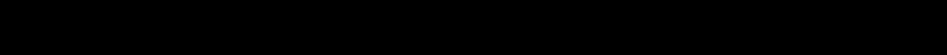

In [ ]:
def train_final_knn_model(X, y, best_k, best_test_size):
    """Train final KNN model and evaluate performance."""

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=best_test_size, random_state=42, stratify=y
    )

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)

    # Evaluate
    y_pred = knn.predict(X_test_scaled)

    print("\n" + "=" * 70)
    print("FINAL KNN MODEL - TEST SET PERFORMANCE")
    print("=" * 70)
    print(f"Train set: {len(X_train)} players | Test set: {len(X_test)} players")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Top Attacker', 'Top Attacker']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Not Top', 'Top'], yticklabels=['Not Top', 'Top'])
    plt.title('Confusion Matrix - KNN Classifier', fontsize=13, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return knn, X_train_scaled, X_test_scaled, scaler

### Random Forest

In [ ]:
def evaluate_random_forest(y_test, y_pred, best_rf, X_test_scaled, features):
    """Display detailed evaluation metrics and confusion matrix."""

    print("\n" + "=" * 70)
    print("RANDOM FOREST - TEST SET PERFORMANCE")
    print("=" * 70)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Top Attacker', 'Top Attacker']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Not Top', 'Top'], yticklabels=['Not Top', 'Top'])

    # Add percentages
    for i in range(2):
        for j in range(2):
            total = cm[i].sum()
            pct = cm[i, j] / total * 100 if total > 0 else 0
            plt.text(j + 0.5, i + 0.7, f'({pct:.1f}%)',
                     ha='center', va='center', fontsize=10, color='gray', fontweight='bold')

    plt.title('Confusion Matrix - Random Forest Classifier', fontsize=13, fontweight='bold')
    plt.ylabel('True Label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Feature Importance from Random Forest
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': best_rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n" + "=" * 70)
    print("FEATURE IMPORTANCE (Random Forest)")
    print("=" * 70)
    print(feature_importance.to_string(index=False))

    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(feature_importance)))

    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
    plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
    plt.title('Feature Importance - Random Forest Model', fontsize=13, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)

    for i, v in enumerate(feature_importance['Importance'].values):
        plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return feature_importance


## Analyse des résultats

Sures deux modèles, on remarque que les performances des deux modèles sont élevé et proches. L'acuracy et de environs 0,99 et le F1-score est de plus 0.95 pour les deux modèles.

## Analyse du modèle KNN
Le modèle KNN présente une accuracy de 0,9930 est un F1-score global de 0,9636, le modèle est entrainer de 573 observations.
On remarque une précision est de 1 ce qui nous montre une faible présence de faux positifs
Le rappel (0,93) est légèrement plus faible que ce lui de Random Forest ce qui veut dire que des TopAttacker ne sont pas detectés (faux négatifs) est faible mais plus élevé que le Random Forest.

## Analyse du modèle Random Forest
Le modèle Random Forest présente une accuracy de 0,9919 et un F1-score global de 0,9583, le modèle est entrainer de 492 observations.
On remarque une précision est de 0,98 ce qui nous montre une faible présence de faux positifs mais moins précis que le KNN(1).
Le rappel 0,94 est légèrement plus grand que ce lui deu KNN Forest ce qui veut dire que le nombres des TopAttacker qui ne sont pas detectés (faux négatifs) est plus faible que celui du KNN.

| Modèle            | Taille test |   Accuracy | F1-score (global) | Précision TopAttacker | Rappel TopAttacker | F1 TopAttacker |
| ----------------- | ----------: | ---------: | ----------------: | --------------------: | -----------------: | -------------: |
| **KNN (final)**   |         573 | **0.9930** |        **0.9636** |              **1.00** |               0.93 |           0.96 |
| **Random Forest** |         492 |     0.9919 |            0.9583 |                  0.98 |           **0.94** |           0.96 |

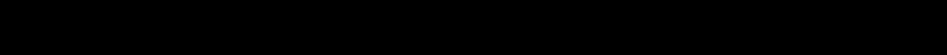

## 6.3 Résultats des modèles

 Les résultats obtenus sont en accord avec les suppositions initiales, car les deux modèles réussissent à classer correctement les joueurs malgré le déséquilibre entre les différentes classes. Une précision élevée et un score F1 supérieur à 0,95 indiquent que la classe TopAttacker est bien considérée.

 Un biais lié à la disproportion des classes a été constaté : la classe Not TopAttacker est plus précisément prédite que la classe TopAttacker. La plupart des erreurs se rapportent aux joueurs TopAttacker, qui sont parfois mal classés en tant que Not TopAttacker.

 Il est plus complexe de prédire la classe TopAttacker puisqu'elle constitue une part minoritaire du jeu de données. De plus, certains joueurs affichent des statistiques similaires sans appartenir aux 10 % les plus performants.

Les variables les plus importantes du modèle Random Forest sont principalement liées aux statistiques offensives (buts, tirs, tirs cadrés, actions menant à un but), ce qui est cohérent avec la problématique et avec la construction de la variable AttackScore.

## 6.4 Visualisation de données
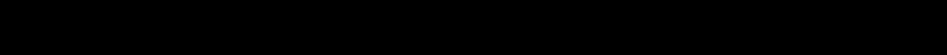

### Le KNN

In [ ]:
def visualize_knn_with_pca(df, X, knn, scaler, num, features):
    """Visualize KNN clusters using PCA with 2 different colorings."""

    # Scale all data and get predictions
    X_scaled = scaler.fit_transform(X)
    predictions = knn.predict(X_scaled)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print("\n" + "=" * 70)
    print("PCA VISUALIZATION")
    print("=" * 70)

    # AttackScore Gradient Visualization
    fig, ax = plt.subplots(figsize=(10, 8))

    mask_not_top = predictions == 0
    mask_top = predictions == 1

    attack_scores = df.loc[num.index, 'AttackScore'].values

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                          c=attack_scores, cmap='YlOrRd', alpha=0.7, s=120, edgecolors='black', linewidth=0.5)
    ax.scatter(X_pca[mask_top, 0], X_pca[mask_top, 1],
                c='darkred', alpha=0.9, s=250, marker='*', edgecolors='darkred', linewidth=2, label='Top Attacker',
                zorder=10)

    ax.set_xlabel(f'PC1', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'PC2', fontsize=12, fontweight='bold')
    ax.set_title('Players - Colored by AttackScore', fontsize=13, fontweight='bold')
    plt.colorbar(scatter, ax=ax, label='AttackScore')
    ax.legend(fontsize=11, loc='best')
    ax.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


### Random Forest

In [ ]:
def visualize_rf_with_pca(df, X, best_rf, scaler, num):
    """Visualize Random Forest predictions using PCA."""

    # Scale all data and get predictions
    X_scaled = scaler.fit_transform(X)
    predictions = best_rf.predict(X_scaled)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print("\n" + "=" * 70)
    print("PCA VISUALIZATION - RANDOM FOREST PREDICTIONS")
    print("=" * 70)
    print(f"PC1 explains {pca.explained_variance_ratio_[0] * 100:.1f}% of variance")
    print(f"PC2 explains {pca.explained_variance_ratio_[1] * 100:.1f}% of variance")
    print(f"Total: {sum(pca.explained_variance_ratio_) * 100:.1f}%")

    # Visualization
    fig, ax = plt.subplots(figsize=(10, 8))

    mask_not_top = predictions == 0
    mask_top = predictions == 1

    attack_scores = df.loc[num.index, 'AttackScore'].values

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                         c=attack_scores, cmap='YlOrRd', alpha=0.7, s=120, edgecolors='black', linewidth=0.5)
    ax.scatter(X_pca[mask_top, 0], X_pca[mask_top, 1],
               c='darkred', alpha=0.9, s=250, marker='*', edgecolors='darkred', linewidth=2,
               label='Top Attacker (Predicted)',
               zorder=10)

    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)', fontsize=12, fontweight='bold')
    ax.set_title('Random Forest Predictions - Colored by AttackScore', fontsize=13, fontweight='bold')
    plt.colorbar(scatter, ax=ax, label='AttackScore')
    ax.legend(fontsize=11, loc='best')
    ax.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


## 7  - Implémentation des modèles de Machine Learning

Cette section vise à analyser de manière critique les résultats obtenus à partir des modèles de classification, en mettant en évidence leurs limites et les axes d’amélioration possibles.

### 7.1 Limites des modèles
On a remarqué une performance très élevée (L'accuracy est de environs 0,99 et le F1-score est de plus 0.95). Mais une performance très élevé peut conduire à un légerr sur apprentissage.

Comme les classes sont déséquilibré ( Top Attaquants represente que 10 % et le les non Attaquants 90%), la classe minoritaire peut être difficile à prédire.

Le temps de jeu n'est pas pris en compte et est basé sur des statistiques normalisé par match. Un joueur qui a peu jouer (niveau temps) mais a marqué un but. Quand à un joueur qui a joué tout le match peut etre un non Top Attaquant, même si c'est le meilleur attaquant de l'efectif.

Le Data set aussi se limite à une saison (2022-2023) et une compétition ici les 5 grand championats européens (Premier League, La Liga, Serie A, Budensliga, Ligue 1).

## 7.2 Pistes d'amélioration

Pour améliorer notre projet, nous avons envisagés plusieurs pistes.
On pourrait mieux intégrer le temps de jeux , en utilisant le temps de jeu.
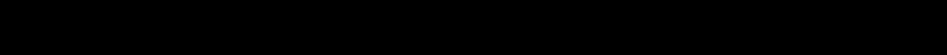